In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This is for custom colormap
# https://matplotlib.org/tutorials/colors/colorbar_only.html
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image

In [2]:
# Dont worry about why I choose it
my_random_state = 13

### Load Data

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)

# To simplify the decision tree, 
# I am restricting it to only one feature
df = df[['petal length (cm)']]

df['target'] = data.target

In [4]:
df.head(2)

,petal length (cm),target
0,1.4,0
1,1.4,0


### Split Data into Training and Test Sets

In [5]:
# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(df['petal length (cm)'],df['target'],random_state=my_random_state)

One of the benefits of Decision Trees is that you don't have to standardize your data unlike PCA and logistic regression which are [sensitive to effects of not standardizing your data](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py).

## Classification Tree

<b>Step 1</b>: Import the model you want to use

In [6]:
from sklearn.tree import DecisionTreeClassifier

<b>Step 2</b>: Make an instance of the Model

In [7]:
clf = DecisionTreeClassifier(max_depth=2, random_state=my_random_state)

<b>Step 3</b>: Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [8]:
clf.fit(X_train.values.reshape(-1, 1), y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=13,
            splitter='best')

<b>Step 4</b>: Predict the labels of new data (new images)

To predict a class of a new instance given its feature measurements using the decision tree, start at the root of the decision tree and take the decision at the each level based on the appropriate feature measurement until you get to the leaf node. The prediction is just the majority class of the instances in that leaf node.

Uses the information the model learned during the model training process

In [9]:
X_test.iloc[0]

4.5

In [10]:
# Predict for 1 observation 
clf.predict(X_test.iloc[0])

array([1])

Predict for Multiple Observations (images) at Once

In [11]:
clf.predict(X_test.values.reshape(-1, 1)[0:10])

array([1, 1, 0, 2, 2, 0, 2, 1, 0, 1])

### Visualize Decision Tree

Dont run if you care about split point. 

You can create a dot file easily with .export_graphviz. Converting it to png can be a hassle without [homebrew](https://hackernoon.com/how-to-install-and-use-homebrew-80eeb55f73e9) or conda. If you don't want to install graphviz, you can use an [online converter](http://webgraphviz.com). 

In [16]:
tree.export_graphviz(clf,
                     out_file="dotfiles/iris_depth2_decisionTree.dot",
                     feature_names=['petal length (cm)'],
                     class_names=data.target_names, 
                     filled = False)

In [17]:
!dot -Tpng -Gdpi=300 dotfiles/iris_depth2_decisionTree.dot -o dotfiles/iris_depth2_decisionTree.png

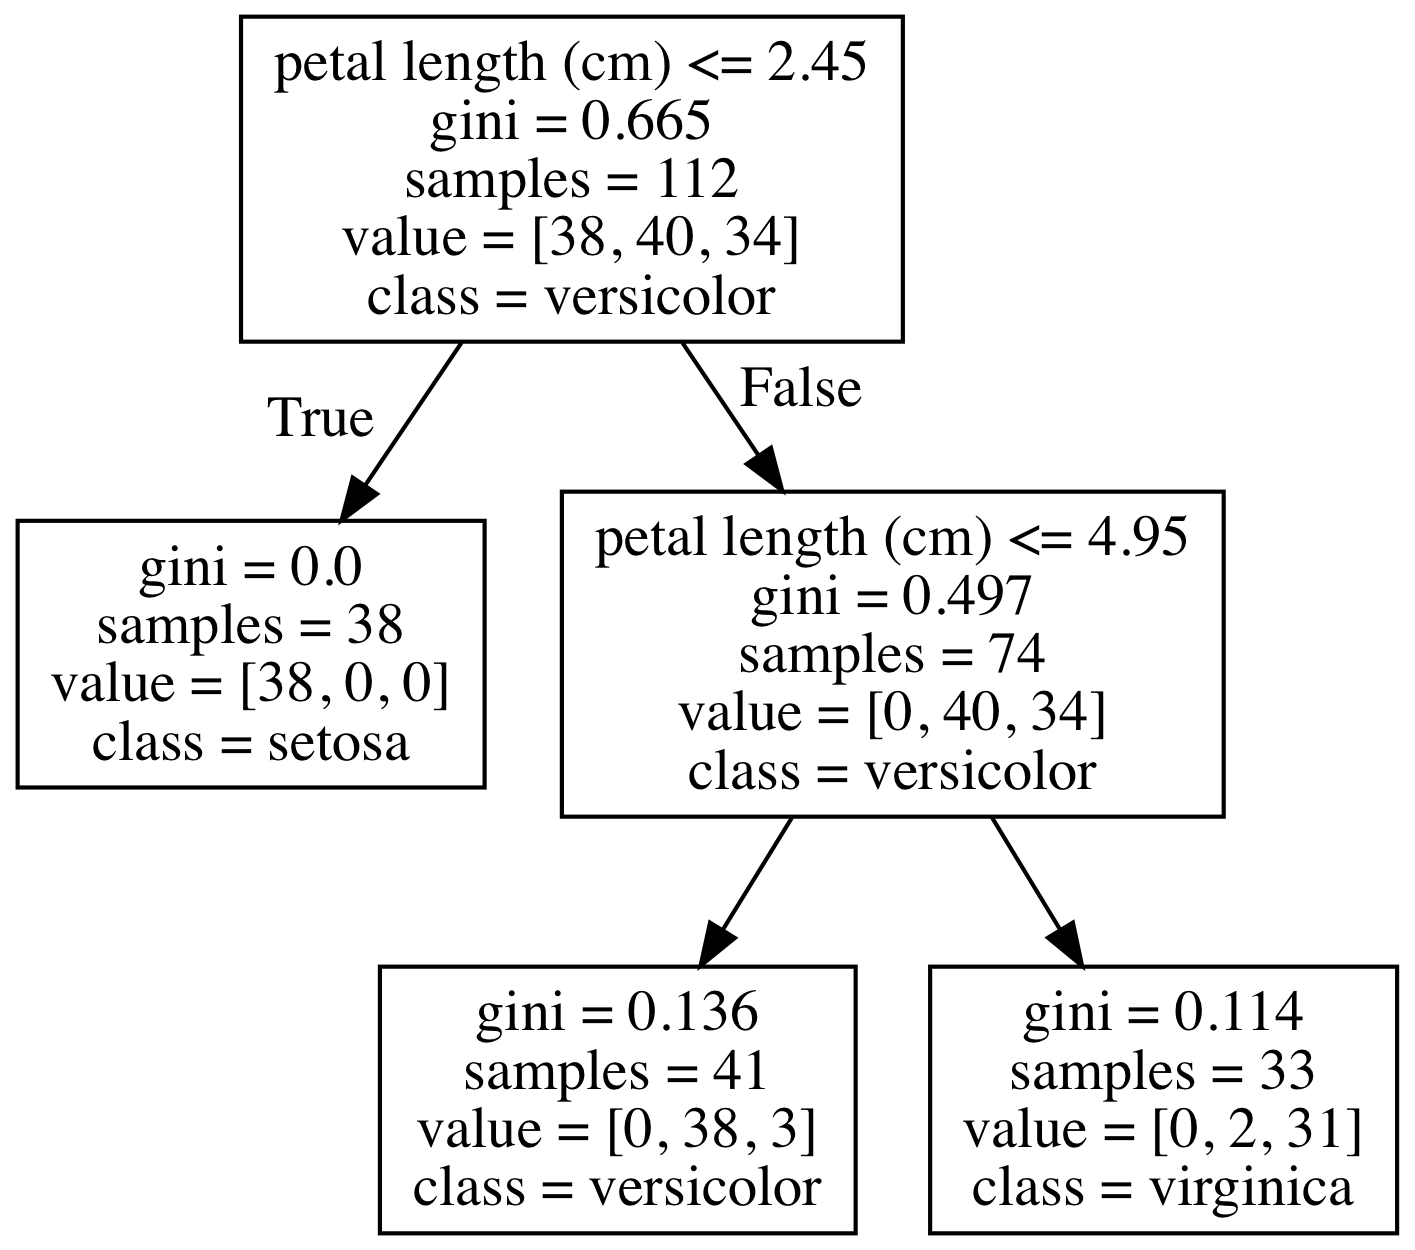

In [18]:
PATH = !pwd
Image(filename =  PATH[0] + "/dotfiles/iris_depth2_decisionTree.png")

I edited the file to have text colors correspond to whether they are leaf/terminal nodes or decision nodes using nano (text editor).

In [15]:
!dot -Tpng -Gdpi=300 Graphviz_Dot_Examples/irisGreenLeafBlueDecisionDepth2.dot -o Graphviz_Dot_Examples/irisGreenLeafBlueDecisionDepth2.png

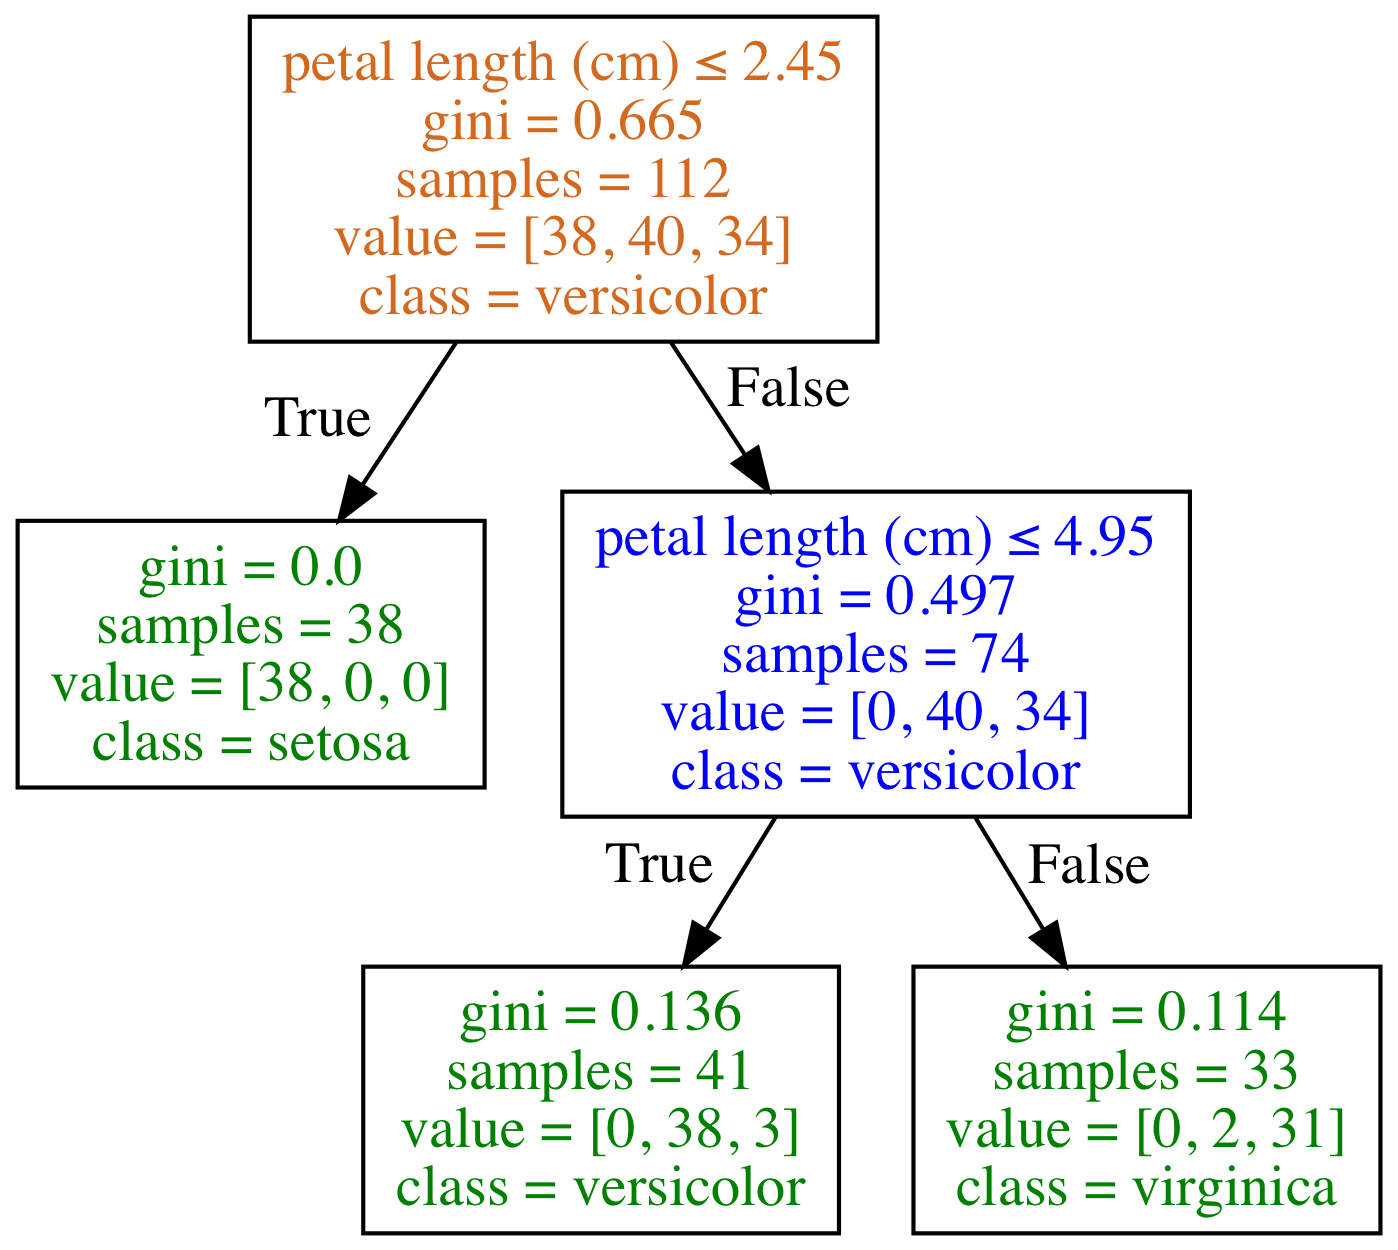

In [16]:
PATH = !pwd
Image(filename =  PATH[0] + "/Graphviz_Dot_Examples/irisGreenLeafBlueDecisionDepth2.png")

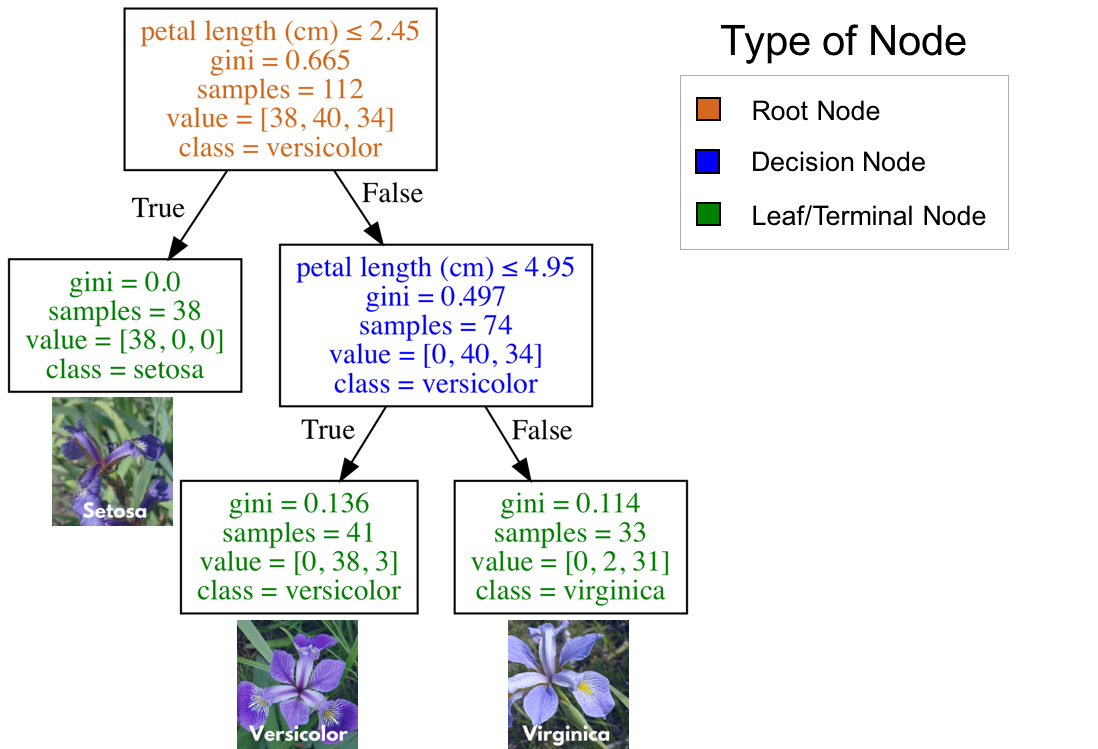

In [17]:
PATH = !pwd
Image(filename =  PATH[0] + "/powerpoint/DT_brown_blue_green.png")

For the purpose of making something pretty for a blog, I made some adjustments to iris_depth2_decisionTreeExample.dot to have more emphasis on the arrows for an example. The final product is below. 

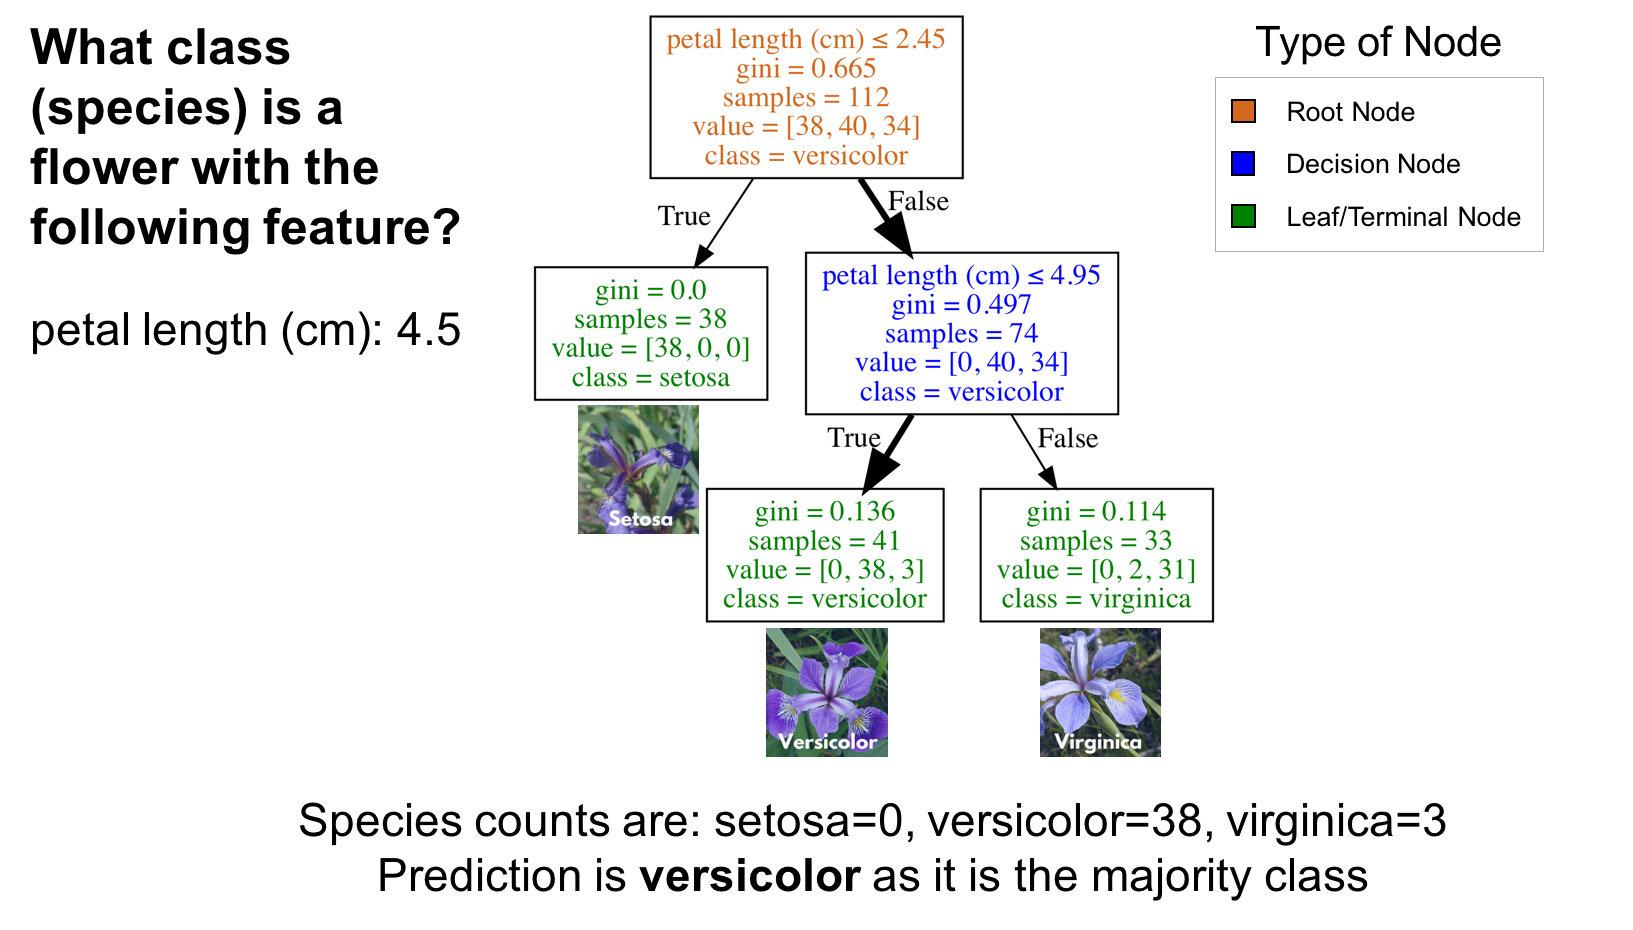

In [18]:
PATH = !pwd
Image(filename =  PATH[0] + "/powerpoint/exampleTreeDone.png")

## Misclassification

In [12]:
X_train.head(1)

68    4.5
Name: petal length (cm), dtype: float64

In [13]:
trainData = pd.concat([X_train, pd.DataFrame(y_train)], axis = 1)

In [14]:
trainData['Nothing'] = 0

In [15]:
trainData.head(1)

,petal length (cm),target,Nothing
68,4.5,1,0


### petal length (cm) <= 2.45

In [19]:
decisionNode1 = trainData.copy()

In [20]:
indicesToKeep = (decisionNode1['target'] == 1)

decisionNode1.loc[indicesToKeep, 'target'] = 2

In [21]:
decisionNode1.target.value_counts(dropna = True)

2    74
0    38
Name: target, dtype: int64

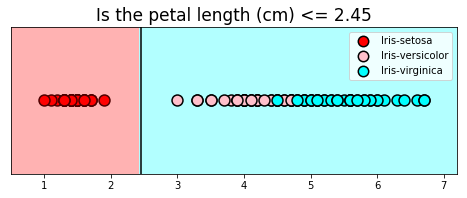

In [23]:
fig = plt.figure(figsize = (8,3))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('')

for index, target, color in zip([0, 1,  2], ['Iris-setosa','Iris-versicolor','Iris-virginica'], ['r','pink','cyan']):
    indicesToKeep = trainData['target'] == index
    
    if index == 1: 
        z_order = 10
    if index == 2:
        z_order = 20
    if index == 0:
        z_order = 1

    ax.scatter(trainData.loc[indicesToKeep, 'petal length (cm)']
               , trainData.loc[indicesToKeep, 'Nothing']
               , c = color
               , s = 120
               , zorder = z_order
               , edgecolors = 'k'
               , linewidth = 1.5)
    
ax.legend(['Iris-setosa','Iris-versicolor','Iris-virginica'], markerscale = .95)    

minimum = trainData.loc[:, 'petal length (cm)'].min() - .5  
maximum = trainData.loc[:, 'petal length (cm)'].max() + .5 

ax.set_ylim(-0.01,0.01)
ax.set_xlim(minimum,maximum)
xlist = np.linspace(minimum, maximum, 100)

# ylist could be anything in this case
ylist = np.linspace(-3.0, 3.0, 100)
xx, yy = np.meshgrid(xlist, ylist)

# Making an array of the same shape as input 
# This is an array to mimic a decision boundary 
Z = xx.copy()

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html
# my decision boundary 
def boundary(array):
    if array <= 2.45:
        return(0)
    if array > 2.45:
        return(2)
    else:
        return()

vfunc = np.vectorize(boundary)
Z = vfunc(Z)

# Put the result into a color plot 
n_classes = 2 

custom_map = mpl.colors.ListedColormap(['red', 'cyan'])

contours = plt.contourf(xx, yy, Z, alpha=0.3,
                       cmap=custom_map,
                       zorder=1)

ax.axvline(x = 2.45, c = 'k')
ax.set_yticks([])
ax.set_yticklabels([])
#ax.set_xlabel('petal length (cm)', fontsize = 14)
ax.set_title('Is the petal length (cm) <= 2.45', fontsize = 17)

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('dotfiles/notperfectClassDN1.png', dpi = 400)

### petal length (cm) <= 4.85 (need to update)

In [23]:
indicesToKeep = (trainData['target'] == 1) | (trainData['target'] == 2)

minimum = trainData.loc[indicesToKeep, 'petal length (cm)'].min() - .1  
maximum = trainData.loc[indicesToKeep, 'petal length (cm)'].max() + .1 
xlist = np.linspace(minimum, maximum, 100)

# ylist could be anything in this case
ylist = np.linspace(-3.0, 3.0, 100)
xx, yy = np.meshgrid(xlist, ylist)

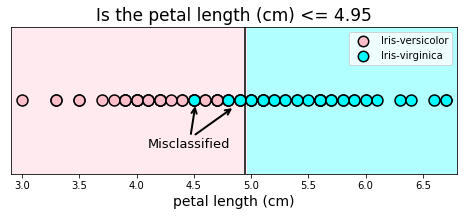

In [24]:
fig = plt.figure(figsize = (8,3))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('')
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'pink', 'cyan']
ax.set_ylim(-0.01,0.01)
for index,(target, color) in enumerate(zip(targets,colors)):
    indicesToKeep = trainData['target'] == index
    
    if index == 1: 
        z_order = 10
    if index == 2:
        z_order = 20
    if index == 0:
        z_order = 10
        continue
    ax.scatter(trainData.loc[indicesToKeep, 'petal length (cm)']
               , trainData.loc[indicesToKeep, 'Nothing']
               , c = color
               , s = 120
               , zorder = z_order
               , edgecolors = 'k'
               , linewidth = 1.5)

ax.legend(['Iris-versicolor', 'Iris-virginica'], markerscale = .95)    

indicesToKeep = (trainData['target'] == 1) | (trainData['target'] == 2)

minimum = trainData.loc[indicesToKeep, 'petal length (cm)'].min() - .1  
maximum = trainData.loc[indicesToKeep, 'petal length (cm)'].max() + .1 
xlist = np.linspace(minimum, maximum, 100)

# ylist could be anything in this case
ylist = np.linspace(-3.0, 3.0, 100)
xx, yy = np.meshgrid(xlist, ylist)


# Making an array of the same shape as input 
# This is an array to mimic a decision boundary 
Z = xx.copy()

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.vectorize.html
# my decision boundary 
def boundary(array):
    if array <= 4.95:
        return(1)
    if array > 4.95:
        return(2)
    else:
        return()

vfunc = np.vectorize(boundary)
Z = vfunc(Z)

# Put the result into a color plot 
n_classes = 2 

custom_map = mpl.colors.ListedColormap(['pink', 'cyan'])

contours = plt.contourf(xx, yy, Z, alpha=0.3,
                       cmap=custom_map,
                       zorder=1)

ax.axvline(x = 4.95, c = 'k')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xlabel('petal length (cm)', fontsize = 14)
ax.set_title('Is the petal length (cm) <= 4.95', fontsize = 17)
# plt.tight_layout()


ax.annotate('Misclassified', xy=(4.515,-0.0005), xytext=(4.1,-0.006), fontsize = 13,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

ax.annotate('', xy=(4.85,-0.0009), xytext=(4.5,-0.0048), fontsize = 13,
            arrowprops={'arrowstyle': '->', 'color': 'black', 'lw': 2},
            va='center');

plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig('dotfiles/notperfectClassDN2.png', dpi = 400)

0.4533333333333333